지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?
* 지역은 어떻게 구분했는지 설명함
* 지역별로 선호하는 게임의 장르를 파악함
* 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함


연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?
* 트렌드는 어떤 것을 기준으로 파악했는지 설명함
* 연도별로 트렌드가 존재하는지 여부를 언급함
* 왜 존재한다/존재하지 않는다고 생각했는지 설명함

인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되었는가?
* 인기가 많다는 것을 어떻게 정의했는지 설명함
* 해당 게임이 왜 인기가 많다고 생각했는지 설명함
* 시각화를 통해 무엇을 나타내고자 하는지를 고려하여 파라미터를 조정함 (제목, 축이름 필수, 그 외 파라미터는 선택사항)
* 해당 분석을 통해 어떤 인사이트를 도출할 수 있는지 설명함

**다음 분기에 어떤 게임을 설계해야 하는지**에 대한 결론이 제시되었는가?
* 분석에 대한 결론이 영상에서 제시됨

추가 조건 (Advanced Goal)
다음 추가 조건은 1개 이상 만족 시 3점을 받을 수 있습니다.

* 디테일한 시점 및 목표 설정이 문제 정의 과정에서 제시되었는가?
* 도메인 지식을 활용하여 비지니스 인사이트를 도출하였는가?
* 제공된 데이터셋 외에 추가 데이터를 사용하였는가?
* 통계적 기법을 활용한 가설 검정을 진행하였는가?
* 완성도 높은 시각화를 보여주었는가?
* 가독성, 목적성이 잘 드러나는 시각화

#Part 1. 데이터 정제

* 결측치는 제거하기보다 No input으로 남겨두는 형태. 총 갯수가 적긴 하지만, 후에 어떤 용도로 사용될지 아직 알 수 없음.
* 컬럼마다 단위를 통일하고 형식을 정돈.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from scipy.stats import binom
import random
import scipy.stats as st
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [34]:
df=pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


None

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [35]:
##결측치 제거
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [8]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [9]:
df_null_A=df[df.Year.isnull() | df.Genre.isnull() |  df.Publisher.isnull()]
df_null_A.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01


In [36]:
df['Year'].fillna(-2000.0, inplace=True)
df['Genre'].fillna('No Input', inplace=True)
df['Publisher'].fillna('No Input', inplace=True)

In [11]:
##데이터 디테일을 보고 포맷 통일하기
for i in range(9) :
  print(df.iloc[:,[i]].value_counts())
  print('')

Name                                   
Need for Speed: Most Wanted                12
Ratatouille                                 9
Madden NFL 07                               9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
                                           ..
Import Tuner Challenge (American sales)     1
Impossible Creatures                        1
In Cold Blood                               1
In The Groove                               1
¡Shin Chan Flipa en colores!                1
Length: 11493, dtype: int64

Platform
DS          2163
PS2         2161
PS3         1329
Wii         1325
X360        1265
PSP         1213
PS          1196
PC           960
XB           824
GBA          822
GC           556
3DS          509
PSV          413
PS4          336
N64          319
SNES         239
XOne         213
SAT          173
WiiU         143
2600         133
NES           98
GB            98
DC            52
GEN           27
NG      

In [37]:
##NBA 2K16 의 자료를 조사해본 결과, ( https://www.vgchartz.com/game/85557/nba-2k16/ ) 판매고의 단위는 모두 million.

def convert_Y(inp):
  if inp < 50 :
    inp += 2000
  if 50 < inp < 100 :
    inp += 1900
  return inp

def convert_MK(inp):
  inp = str(inp)
  if 'M' in inp:
    inp = inp.replace('M','')
  if 'K' in inp:
    inp = inp.replace('K','')
    inp = float(inp) / 1000
  return inp

df.Year = df.Year.apply(convert_Y)
df.NA_Sales = df.NA_Sales.apply(convert_MK)
df.EU_Sales = df.EU_Sales.apply(convert_MK)
df.JP_Sales = df.JP_Sales.apply(convert_MK)
df.Other_Sales = df.Other_Sales.apply(convert_MK)



In [38]:
df = df.astype({'Year':'int', 'NA_Sales':'float', 'EU_Sales':'float', 'JP_Sales':'float', 'Other_Sales':'float'})
df['Global']=df.NA_Sales+df.EU_Sales+df.JP_Sales+df.Other_Sales

In [39]:
for i in range(9) :
  print(df.iloc[:,[i]].value_counts())
  print('')

Name                                   
Need for Speed: Most Wanted                12
Ratatouille                                 9
Madden NFL 07                               9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
                                           ..
Import Tuner Challenge (American sales)     1
Impossible Creatures                        1
In Cold Blood                               1
In The Groove                               1
¡Shin Chan Flipa en colores!                1
Length: 11493, dtype: int64

Platform
DS          2163
PS2         2161
PS3         1329
Wii         1325
X360        1265
PSP         1213
PS          1196
PC           960
XB           824
GBA          822
GC           556
3DS          509
PSV          413
PS4          336
N64          319
SNES         239
XOne         213
SAT          173
WiiU         143
2600         133
NES           98
GB            98
DC            52
GEN           27
NG      

In [2]:
##Part 1 All in one code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from scipy.stats import binom
import random
import scipy.stats as st
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df=pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df['Year'].fillna(-2000.0, inplace=True)
df['Genre'].fillna('No Input', inplace=True)
df['Publisher'].fillna('No Input', inplace=True)

def convert_Y(inp):
  if inp < 50 :
    inp += 2000
  if 50 < inp < 100 :
    inp += 1900
  return inp

def convert_MK(inp):
  inp = str(inp)
  if 'M' in inp:
    inp = inp.replace('M','')
  if 'K' in inp:
    inp = inp.replace('K','')
    inp = float(inp) / 1000
  return inp

def convert_port(inp):
  if inp in ['DS', 'PSP', 'GBA', '3DS', 'PSV', 'GB', 'WS']:
    res = 1
  else:
    res = 0
  return res

df.Year = df.Year.apply(convert_Y)
df.NA_Sales = df.NA_Sales.apply(convert_MK)
df.EU_Sales = df.EU_Sales.apply(convert_MK)
df.JP_Sales = df.JP_Sales.apply(convert_MK)
df.Other_Sales = df.Other_Sales.apply(convert_MK)
df = df.astype({'Year':'int', 'NA_Sales':'float', 'EU_Sales':'float', 'JP_Sales':'float', 'Other_Sales':'float'})
df['Global']=df.NA_Sales+df.EU_Sales+df.JP_Sales+df.Other_Sales


df['Genre_Num']=df['Genre'].replace(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle', 'No Input'],[0,1,2,3,4,5,6,7,8,9,10,11,12])
df = df.astype({'Genre_Num':'int'})

df['Portable']=df['Platform'].apply(convert_port)
df = df.astype({'Portable':'int'})


##log scaling
df_tmp = np.log(df.iloc[:,5:10]*(1000)+1.0)
df_log = pd.concat([df.iloc[:,0:5],df_tmp],axis=1)
df_log['Genre_Num']=df['Genre_Num']
df_log['Portable']=df['Portable']


## Part 2 분석
# A. 상위권 분포 

AxesSubplot(0.125,0.125;0.775x0.755)


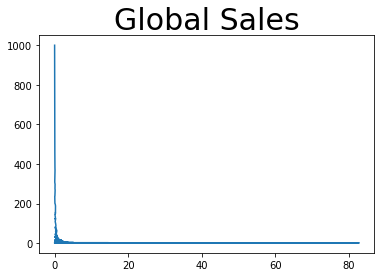

In [113]:
plt.title("Global Sales", fontsize=30)

print(df.Global.value_counts().sort_values().plot())

In [49]:
print('less then 1 million:', df[df['Global'] < 1].Global.count(), '/', df.Global.count())
print('less then 0.1 million:', df[df['Global'] < 0.1].Global.count(), '/', df.Global.count())

less then 1 million: 14519 / 16598
less then 0.1 million: 5982 / 16598


AxesSubplot(0.125,0.125;0.775x0.755)


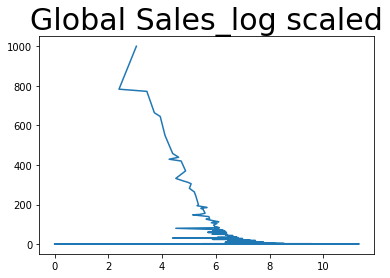

In [35]:
plt.title("Global Sales_log scaled", fontsize=30)

print(df_log.Global.value_counts().sort_values().plot())

In [17]:
df_top = df.sort_values(by=['Global'], ascending=False)
top_game_sale = df_top.head(30)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global']]
top_game_sale = top_game_sale.sort_values(by=['Global'], ascending=False)
top_game_sale = top_game_sale.reset_index(drop=True)
top_game_sale

,Name,Year,Genre,Global
0,Wii Sports,2006,Sports,82.74
1,Super Mario Bros.,1985,Platform,40.24
2,Mario Kart Wii,2008,Racing,35.83
3,Wii Sports Resort,2009,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,31.38
5,Tetris,1989,Puzzle,30.26
6,New Super Mario Bros.,2006,Platform,30.01
7,Wii Play,2006,Misc,29.01
8,New Super Mario Bros. Wii,2009,Platform,28.61
9,Duck Hunt,1984,Shooter,28.31


In [9]:
print(df.iloc[:,[9]].value_counts().sort_values())


Global
82.74        1
10.77        1
10.69        1
21.82        1
10.58        1
          ... 
0.05       645
0.04       664
0.03       772
0.01       783
0.02      1000
Length: 1009, dtype: int64


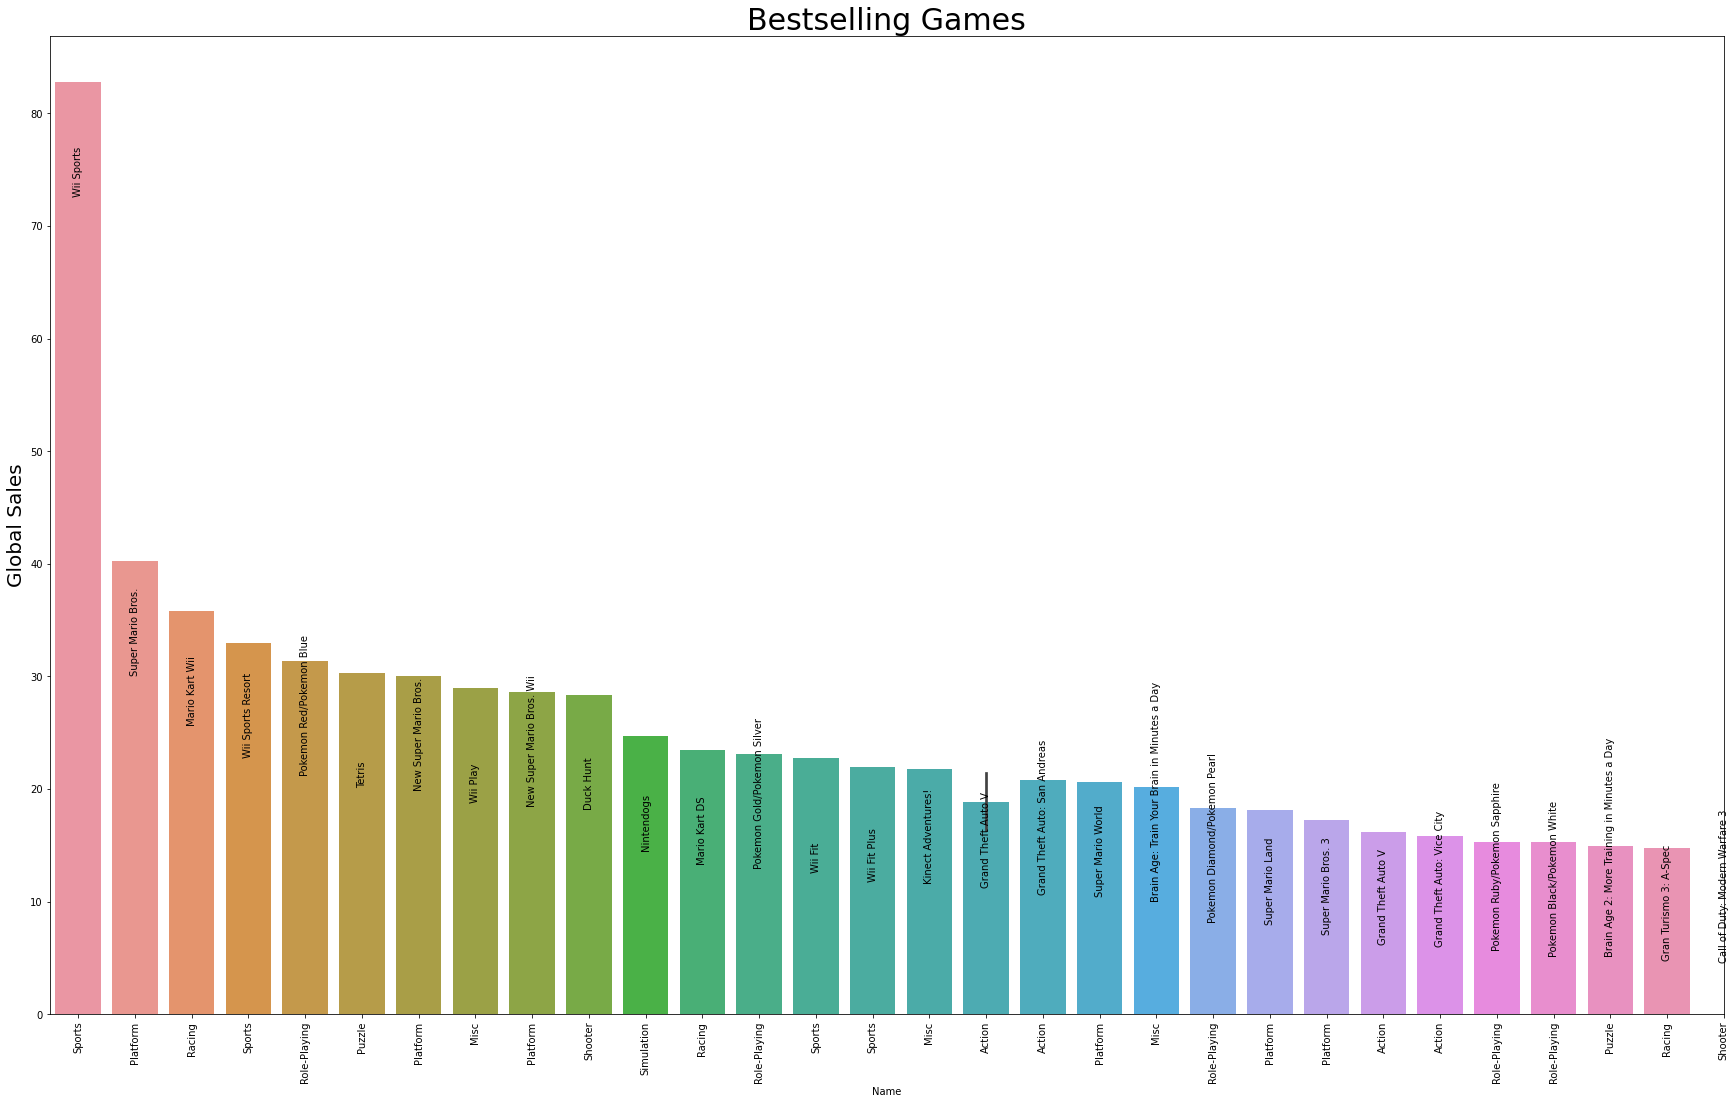

In [27]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 30)

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global', data=top_game_sale)
index = 0
for value in top_game_sale['Global']:
    g.text(index, value - 10, name[index], color='#000', size=10, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Genre'], fontsize=10, rotation=90)
plt.title("Bestselling Games", fontsize=30)
plt.ylabel("Global Sales", fontsize=20)
plt.show()

*최상위권 게임과 하위권 게임의 격차가 크고, 하위권 게임으로 갈수록 수가 급격히 많아지는 구조를 관찰할 수 있다.

*소수의 잘나가는 프랜차이즈가 시장을 견인하는 효과가 굉장히 크다는 사실을 알 수 있다.





# B. 지역별 선호 장르

* 지역은 북미, 일본, 유럽, 기타지역, 글로벌으로 분류

#  Method1. 평균

* 각 지역별로 장르를 독립변수로, 매출을 종속변수로 두고 일원분산분석을 시도할 수 있다.
* 정규성/등분산성 검정을 우선 실시한 후, ANOVA 테스트를 실시하도록 한다.
 > 하지만 정규성 확보가 전혀 되지 않았으므로, 계획을 바꿔 카이제곱 검정을 실시한다.
 >> 카이제곱 검정에서도 뾰족한 결과가 나오지 않았으므로, 표본추출에 의한 일원분산분석을 실시한다.


In [69]:
## 정규성 검정 - ks test
print('NA_Sales', ': ', st.kstest(df_log.NA_Sales, 'norm')[1] > 0.05)
for k1, group in df_log.groupby('Genre'):
    print(k1, ': ', st.kstest(group.NA_Sales, 'norm')[1] > 0.05)
print('EU_Sales', ': ', st.kstest(df_log.EU_Sales, 'norm')[1] > 0.05)
for k1, group in df_log.groupby('Genre'):
    print(k1, ': ', st.kstest(group.EU_Sales, 'norm')[1] > 0.05)
print('JP_Sales', ': ', st.kstest(df_log.JP_Sales, 'norm')[1] > 0.05)
for k1, group in df_log.groupby('Genre'):
    print(k1, ': ', st.kstest(group.JP_Sales, 'norm')[1] > 0.05)
print('Other_Sales', ': ', st.kstest(df_log.Other_Sales, 'norm')[1] > 0.05)
for k1, group in df_log.groupby('Genre'):
    print(k1, ': ', st.kstest(group.Other_Sales, 'norm')[1] > 0.05)
print('Global', ': ', st.kstest(df_log.Global, 'norm')[1] > 0.05)
for k1, group in df_log.groupby('Genre'):
    print(k1, ': ', st.kstest(group.Global, 'norm')[1] > 0.05)

NA_Sales :  False
Action :  False
Adventure :  False
Fighting :  False
Misc :  False
No Input :  False
Platform :  False
Puzzle :  False
Racing :  False
Role-Playing :  False
Shooter :  False
Simulation :  False
Sports :  False
Strategy :  False
EU_Sales :  False
Action :  False
Adventure :  False
Fighting :  False
Misc :  False
No Input :  False
Platform :  False
Puzzle :  False
Racing :  False
Role-Playing :  False
Shooter :  False
Simulation :  False
Sports :  False
Strategy :  False
JP_Sales :  False
Action :  False
Adventure :  False
Fighting :  False
Misc :  False
No Input :  False
Platform :  False
Puzzle :  False
Racing :  False
Role-Playing :  False
Shooter :  False
Simulation :  False
Sports :  False
Strategy :  False
Other_Sales :  False
Action :  False
Adventure :  False
Fighting :  False
Misc :  False
No Input :  False
Platform :  False
Puzzle :  False
Racing :  False
Role-Playing :  False
Shooter :  False
Simulation :  False
Sports :  False
Strategy :  False
Global :  Fal

In [102]:
## 정규성 검정 - shapiro test
print('NA_Sales' , ': ', st.shapiro(df_log.NA_Sales)[1] > 0.05)
for k1, group in df_log.groupby('Genre'):
    print(k1, ': ', st.shapiro(group.NA_Sales)[1] > 0.05)
print('EU_Sales', ': ', st.shapiro(df_log.EU_Sales)[1] > 0.05)
for k1, group in df_log.groupby('Genre'):
    print(k1, ': ', st.shapiro(group.EU_Sales)[1] > 0.05)
print('JP_Sales', ': ', st.shapiro(df_log.JP_Sales)[1] > 0.05)
for k1, group in df_log.groupby('Genre'):
    print(k1, ': ', st.shapiro(group.JP_Sales)[1] > 0.05)
print('Other_Sales', ': ', st.shapiro(df_log.Other_Sales)[1] > 0.05)
for k1, group in df_log.groupby('Genre'):
    print(k1, ': ', st.shapiro(group.Other_Sales)[1] > 0.05)
print('Global', ': ', st.shapiro(df_log.Global)[1] > 0.05)
for k1, group in df_log.groupby('Genre'):
    print(k1, ': ', st.shapiro(group.Global)[1] > 0.05)

NA_Sales :  False
Action :  False
Adventure :  False
Fighting :  False
Misc :  False
No Input :  False
Platform :  False
Puzzle :  False
Racing :  False
Role-Playing :  False
Shooter :  False
Simulation :  False
Sports :  False
Strategy :  False
EU_Sales :  False
Action :  False
Adventure :  False
Fighting :  False
Misc :  False
No Input :  False
Platform :  False
Puzzle :  False
Racing :  False
Role-Playing :  False
Shooter :  False
Simulation :  False
Sports :  False
Strategy :  False
JP_Sales :  False
Action :  False
Adventure :  False
Fighting :  False
Misc :  False
No Input :  False
Platform :  False
Puzzle :  False
Racing :  False
Role-Playing :  False
Shooter :  False
Simulation :  False
Sports :  False
Strategy :  False
Other_Sales :  False
Action :  False
Adventure :  False
Fighting :  False
Misc :  False
No Input :  False
Platform :  False
Puzzle :  False
Racing :  False
Role-Playing :  False
Shooter :  False
Simulation :  False
Sports :  False
Strategy :  False
Global :  Fal

In [73]:
## 등분산성 검정 

for i in range(5,10):
  df_0=df_log.query('Genre=="Action"').iloc[:,i]
  df_1=df_log.query('Genre=="Adventure"').iloc[:,i]
  df_2=df_log.query('Genre=="Fighting"').iloc[:,i]
  df_3=df_log.query('Genre=="Misc"').iloc[:,i]
  df_4=df_log.query('Genre=="No Input"').iloc[:,i]
  df_5=df_log.query('Genre=="Platform"').iloc[:,i]
  df_6=df_log.query('Genre=="Puzzle"').iloc[:,i]
  df_7=df_log.query('Genre=="Racing"').iloc[:,i]
  df_8=df_log.query('Genre=="Role-Playing"').iloc[:,i]
  df_9=df_log.query('Genre=="Shooter"').iloc[:,i]
  df_10=df_log.query('Genre=="Simulation"').iloc[:,i]
  df_11=df_log.query('Genre=="Sports"').iloc[:,i]
  df_12=df_log.query('Genre=="Strategy"').iloc[:,i]

  print(i, ': ', st.levene(df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12)[1] > 0.05)


5 :  False
6 :  False
7 :  False
8 :  False
9 :  False


In [74]:
## 등분산성 검정 

for i in range(5,9):
  print(i, ': ', st.levene(df_log.Global, df_log.iloc[:, i])[1] > 0.05)


5 :  False
6 :  False
7 :  False
8 :  False


In [75]:
#평균치 체크
print(df_log.iloc[:,5:10].mean())
print(df_log.groupby('Genre').mean())

NA_Sales       3.643684
EU_Sales       2.842437
JP_Sales       1.615653
Other_Sales    2.143258
Global         5.169795
dtype: float64
                     Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales    Global
Genre                                                                         
Action        1969.635401  3.938660  3.238637  1.453048     2.346244  5.257253
Adventure     1992.440625  1.938486  1.538834  2.093116     1.097997  4.203379
Fighting      1976.221960  3.609781  2.824724  2.447565     2.130347  5.361729
Misc          1973.689158  3.481951  2.411120  1.338818     2.033159  5.090476
No Input      2006.020000  4.330082  2.962298  1.734185     2.589555  5.470489
Platform      1981.145928  4.720261  3.709073  1.582944     2.462497  5.619328
Puzzle        1967.081315  3.466132  2.116742  1.353583     1.605709  4.774170
Racing        1967.749799  4.293403  3.582479  0.773387     2.446717  5.264226
Role-Playing  1984.054619  2.876237  2.263158  3.392229     1.882313  5.253

In [76]:
#카이제곱 검정
mat_mean = df_log.groupby('Genre').mean()
mat_NA = np.array(mat_mean.iloc[:, 1])
mat_EU = np.array(mat_mean.iloc[:, 2])
mat_JP = np.array(mat_mean.iloc[:, 3])
mat_Other = np.array(mat_mean.iloc[:, 4])
mat_GL = np.array(mat_mean.iloc[:, 5])
mat_NA /= mat_NA.sum()
mat_EU /= mat_EU.sum()
mat_JP /= mat_JP.sum()
mat_Other /= mat_Other.sum()
mat_GL /= mat_GL.sum()

In [77]:
print(st.chisquare(mat_NA, f_exp=mat_GL)[1])
print(st.chisquare(mat_EU, f_exp=mat_GL)[1])
print(st.chisquare(mat_JP, f_exp=mat_GL)[1])
print(st.chisquare(mat_Other, f_exp=mat_GL)[1])

0.9999999999999887
0.9999999999999788
0.9999999996163694
0.9999999999999969


In [150]:
#카이제곱 검정에서도 뚜렷한 결과는 나오지 않음. 따라서 표본 추출로 정규분포성을 강제로 확보하여 실험을 진행.
np.random.seed(10)

samples_NA = pd.DataFrame()
samples_EU = pd.DataFrame()
samples_JP = pd.DataFrame()
samples_Other = pd.DataFrame()


for i in range(0,12):
  samples_NAt = []
  samples_EUt = []
  samples_JPt = []
  samples_Othert = []
  for _ in range(10000):
    bootsample = df[df['Genre_Num']==i].sample(30, replace=True)
    samples_NAt.append(bootsample.NA_Sales.mean())
    samples_EUt.append(bootsample.EU_Sales.mean())
    samples_JPt.append(bootsample.JP_Sales.mean())
    samples_Othert.append(bootsample.Other_Sales.mean())

  samples_NAtt = pd.DataFrame(samples_NAt)
  samples_EUtt = pd.DataFrame(samples_EUt)
  samples_JPtt = pd.DataFrame(samples_JPt)
  samples_Othertt = pd.DataFrame(samples_Othert)
  samples_NA=pd.concat([samples_NA, samples_NAtt], axis=1)
  samples_EU=pd.concat([samples_EU, samples_EUtt], axis=1)
  samples_JP=pd.concat([samples_JP, samples_JPtt], axis=1)
  samples_Other=pd.concat([samples_Other, samples_Othertt], axis=1)

In [152]:
np.random.seed(10)

samples_Whole_NA = []
samples_Whole_EU = []
samples_Whole_JP = []
samples_Whole_Other = []

for _ in range(10000):
  bootsample = df.sample(30, replace=True)
  samples_Whole_NA.append(bootsample.NA_Sales.mean())
  samples_Whole_EU.append(bootsample.EU_Sales.mean())
  samples_Whole_JP.append(bootsample.JP_Sales.mean())
  samples_Whole_Other.append(bootsample.Other_Sales.mean())

In [171]:
samples_Whole_NA = pd.DataFrame(samples_Whole_NA)
samples_Whole_EU = pd.DataFrame(samples_Whole_EU)
samples_Whole_JP = pd.DataFrame(samples_Whole_JP)
samples_Whole_Other = pd.DataFrame(samples_Whole_Other)

NA_Sales_mean=       samples_Whole_NA.mean()[0]
EU_Sales_mean=       samples_Whole_EU.mean()[0]
JP_Sales_mean=       samples_Whole_JP.mean()[0]
Other_Sales_mean=    samples_Whole_Other.mean()[0]

NA_Sales_mean, EU_Sales_mean, JP_Sales_mean, Other_Sales_mean

(0.26616426666666665,
 0.14632233333333336,
 0.07811863333333333,
 0.048080700000000004)

In [172]:
## 1 sample t test for all genre
print('NA_Sales:', NA_Sales_mean)
for i in range(0,12):
    if st.ttest_1samp(samples_NA.iloc[:,i], NA_Sales_mean)[1] < 0.05 :
      print(i, ': ', samples_NA.iloc[:,i].mean() - NA_Sales_mean)
print('')
print('EU_Sales', EU_Sales_mean)
for i in range(0,12):
    if st.ttest_1samp(samples_EU.iloc[:,i], EU_Sales_mean)[1] < 0.05 :
      print(i, ': ', samples_EU.iloc[:,i].mean() - EU_Sales_mean)
print('')
print('JP_Sales', JP_Sales_mean)
for i in range(0,12):
    if st.ttest_1samp(samples_JP.iloc[:,i], JP_Sales_mean)[1] < 0.05 :
      print(i, ': ', samples_JP.iloc[:,i].mean() - JP_Sales_mean)
print('')
print('Other_Sales', Other_Sales_mean)
for i in range(0,12):
    if st.ttest_1samp(samples_Other.iloc[:,i], Other_Sales_mean)[1] < 0.05 :
      print(i, ': ', samples_Other.iloc[:,i].mean() - Other_Sales_mean)
print('')
#print('Global', df.iloc[:,9].mean())
#for i in range(0,12):
#    if st.ttest_1samp(group.Global, Global_mean)[1] < 0.05 :
#      print(i, ': ', group.Global.mean())

NA_Sales: 0.26616426666666665
1 :  0.02442850000000002
2 :  -0.03134016666666664
3 :  -0.050903199999999954
4 :  0.17911816666666674
5 :  -0.18381479999999997
6 :  0.017689433333333393
7 :  0.23873780000000006
8 :  -0.05513139999999997
10 :  -0.16515156666666664
11 :  -0.05383836666666664

EU_Sales 0.14632233333333336
0 :  0.010854766666666626
1 :  0.014471766666666636
2 :  -0.0244317666666667
3 :  -0.022818566666666693
4 :  0.09417253333333331
5 :  -0.09628543333333336
6 :  0.042176799999999987
7 :  0.08206369999999993
8 :  -0.01617230000000003
9 :  -0.026224966666666683
10 :  -0.07967403333333337
11 :  -0.058551133333333366

JP_Sales 0.07811863333333333
0 :  -0.030465133333333325
1 :  -0.020133633333333324
2 :  -0.017367033333333316
3 :  0.15368706666666665
4 :  -0.048900833333333324
5 :  -0.03732656666666666
6 :  -0.033782333333333324
7 :  0.0691001
8 :  -0.004503300000000002
9 :  0.024971700000000013
10 :  -0.0056292333333333305
11 :  0.02087416666666668

Other_Sales 0.048080700000

In [59]:
#log ver

np.random.seed(10)

lsamples_NA = pd.DataFrame()
lsamples_EU = pd.DataFrame()
lsamples_JP = pd.DataFrame()
lsamples_Other = pd.DataFrame()


for i in range(0,12):
  lsamples_NAt = []
  lsamples_EUt = []
  lsamples_JPt = []
  lsamples_Othert = []
  for _ in range(10000):
    bootsample = df_log[df_log['Genre_Num']==i].sample(30, replace=True)
    lsamples_NAt.append(bootsample.NA_Sales.mean())
    lsamples_EUt.append(bootsample.EU_Sales.mean())
    lsamples_JPt.append(bootsample.JP_Sales.mean())
    lsamples_Othert.append(bootsample.Other_Sales.mean())

  lsamples_NAtt = pd.DataFrame(lsamples_NAt)
  lsamples_EUtt = pd.DataFrame(lsamples_EUt)
  lsamples_JPtt = pd.DataFrame(lsamples_JPt)
  lsamples_Othertt = pd.DataFrame(lsamples_Othert)
  lsamples_NA=pd.concat([lsamples_NA, lsamples_NAtt], axis=1)
  lsamples_EU=pd.concat([lsamples_EU, lsamples_EUtt], axis=1)
  lsamples_JP=pd.concat([lsamples_JP, lsamples_JPtt], axis=1)
  lsamples_Other=pd.concat([lsamples_Other, lsamples_Othertt], axis=1)



lsamples_Whole_NA = []
lsamples_Whole_EU = []
lsamples_Whole_JP = []
lsamples_Whole_Other = []

for _ in range(10000):
  bootsample = df_log.sample(30, replace=True)
  lsamples_Whole_NA.append(bootsample.NA_Sales.mean())
  lsamples_Whole_EU.append(bootsample.EU_Sales.mean())
  lsamples_Whole_JP.append(bootsample.JP_Sales.mean())
  lsamples_Whole_Other.append(bootsample.Other_Sales.mean())


lsamples_Whole_NA = pd.DataFrame(lsamples_Whole_NA)
lsamples_Whole_EU = pd.DataFrame(lsamples_Whole_EU)
lsamples_Whole_JP = pd.DataFrame(lsamples_Whole_JP)
lsamples_Whole_Other = pd.DataFrame(lsamples_Whole_Other)

lNA_Sales_mean=       lsamples_Whole_NA.mean()[0]
lEU_Sales_mean=       lsamples_Whole_EU.mean()[0]
lJP_Sales_mean=       lsamples_Whole_JP.mean()[0]
lOther_Sales_mean=    lsamples_Whole_Other.mean()[0]

lNA_Sales_mean, lEU_Sales_mean, lJP_Sales_mean, lOther_Sales_mean



lsamples_NAt = []
lsamples_EUt = []
lsamples_JPt = []
lsamples_Othert = []

## 1 sample t test for all genre
print('NA_Sales:', lNA_Sales_mean)
for i in range(0,12):
    if st.ttest_1samp(lsamples_NA.iloc[:,i], lNA_Sales_mean)[1] < 0.05 :
      print(i, ': ', lsamples_NA.iloc[:,i].mean() - lNA_Sales_mean)
    lsamples_NAt.append(lsamples_NA.iloc[:,i].mean() - lNA_Sales_mean)
print('')
print('EU_Sales', lEU_Sales_mean)
for i in range(0,12):
    if st.ttest_1samp(lsamples_EU.iloc[:,i], lEU_Sales_mean)[1] < 0.05 :
      print(i, ': ', lsamples_EU.iloc[:,i].mean() - lEU_Sales_mean)
    lsamples_EUt.append(lsamples_EU.iloc[:,i].mean() - lEU_Sales_mean)
print('')
print('JP_Sales', lJP_Sales_mean)
for i in range(0,12):
    if st.ttest_1samp(lsamples_JP.iloc[:,i], lJP_Sales_mean)[1] < 0.05 :
      print(i, ': ', lsamples_JP.iloc[:,i].mean() - lJP_Sales_mean)
    lsamples_JPt.append(lsamples_JP.iloc[:,i].mean() - lJP_Sales_mean)
print('')
print('Other_Sales', lOther_Sales_mean)
for i in range(0,12):
    if st.ttest_1samp(lsamples_Other.iloc[:,i], lOther_Sales_mean)[1] < 0.05 :
      print(i, ': ', lsamples_Other.iloc[:,i].mean() - lOther_Sales_mean)
    lsamples_Othert.append(lsamples_Other.iloc[:,i].mean() - lOther_Sales_mean)
print('')

lsamples_NAtt = pd.DataFrame(lsamples_NAt)
lsamples_EUtt = pd.DataFrame(lsamples_EUt)
lsamples_JPtt = pd.DataFrame(lsamples_JPt)
lsamples_Othertt = pd.DataFrame(lsamples_Othert)

lsamples_NAtt=pd.concat([lsamples_NAtt, lsamples_EUtt], axis=1)
lsamples_JPtt=pd.concat([lsamples_JPtt, lsamples_Othertt], axis=1)
result_log=pd.concat([lsamples_NAtt, lsamples_JPtt], axis=1)

result_log.index=['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
result_log.columns=['NA','EU','JP','Other']

#print('Global', df.iloc[:,9].mean())
#for i in range(0,12):
#    if st.ttest_1samp(group.Global, Global_mean)[1] < 0.05 :
#      print(i, ': ', group.Global.mean())

NA_Sales: 3.644487658840727
0 :  0.30062487670924654
1 :  0.39539457336307704
2 :  -0.16551604269309328
3 :  -0.7658401557091579
4 :  0.8575433224342164
5 :  -1.714045957340124
6 :  0.6502094585814029
7 :  1.0792927100330423
8 :  -0.1118427832060398
9 :  -0.03243717951120795
10 :  -1.4440255739946126
11 :  -0.1771705573239939

EU_Sales 2.8399304998470885
0 :  0.3996419129947153
1 :  0.0708656944791457
2 :  -0.424582684418251
3 :  -0.5767047736652744
4 :  0.9384584866505148
5 :  -1.3017138997671887
6 :  0.7427326712035991
7 :  0.8725600142261238
8 :  -0.3588973079446385
9 :  -0.012292657076245384
10 :  -0.5196064481115741
11 :  -0.7218880180036162

JP_Sales 1.6144678911978714
0 :  -0.16317348516206076
1 :  -0.4301548696532529
2 :  -0.27496907136009807
3 :  1.7767357419765277
4 :  -0.4892243572561905
5 :  0.48025552310552655
6 :  -0.8460526990515822
7 :  -0.03344493977592977
8 :  -0.22089055376408107
9 :  0.8317872638461226
10 :  0.19134947822559178
11 :  -0.254845147669561

Other_Sales 

In [66]:
result_log.T

,Action,Sports,Misc,Role-Playing,Shooter,Adventure,Racing,Platform,Simulation,Fighting,Strategy,Puzzle
NA,0.300625,0.395395,-0.165516,-0.765840,0.857543,-1.714046,0.650209,1.079293,-0.111843,-0.032437,-1.444026,-0.177171
EU,0.399642,0.070866,-0.424583,-0.576705,0.938458,-1.301714,0.742733,0.872560,-0.358897,-0.012293,-0.519606,-0.721888
JP,-0.163173,-0.430155,-0.274969,1.776736,-0.489224,0.480256,-0.846053,-0.033445,-0.220891,0.831787,0.191349,-0.254845
Other,0.210028,0.261221,-0.108985,-0.256159,0.544899,-1.042724,0.302428,0.327942,0.000924,-0.006946,-0.613763,-0.530367


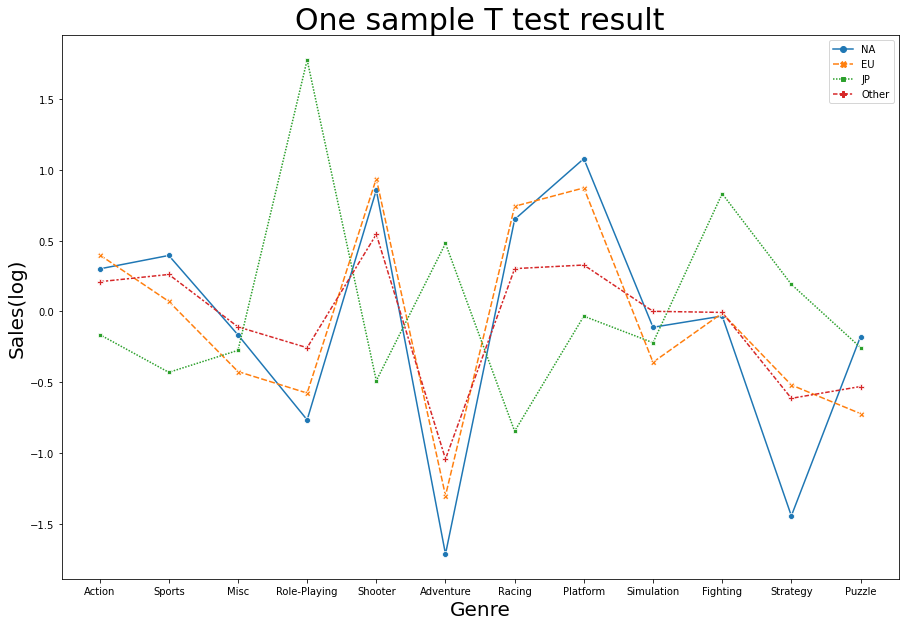

In [115]:
df_stat=df.iloc[:,3:10].groupby('Genre').sum()

plt.figure(figsize=(15, 10))
plt.title("One sample T test result", fontsize=30)
plt.xlabel("Genre", fontsize=20)
plt.ylabel("Sales(log)", fontsize=20)

sns.lineplot(data=result_log, markers=True);

0: Action          
1: Sports          
2: Misc            
3: Role-Playing    
4: Shooter         
5: Adventure       
6: Racing          
7: Platform        
8: Simulation       
9: Fighting         
10: Strategy         
11: Puzzle           
12: No Input          

베스트3, 워스트 3 

북미: 플랫폼, 슈터, 레이싱 // 어드벤쳐, 스트라테지, 롤플레잉

유럽: 슈터, 플랫폼, 레이싱 // 어드벤쳐, 퍼즐, 롤플레잉

일본: 롤플레잉, 파이팅, 어드벤쳐 // 레이싱, 슈터, 스포츠

기타: 슈터, 플랫폼, 레이싱 // 어드벤쳐, 스트라테지, 퍼즐

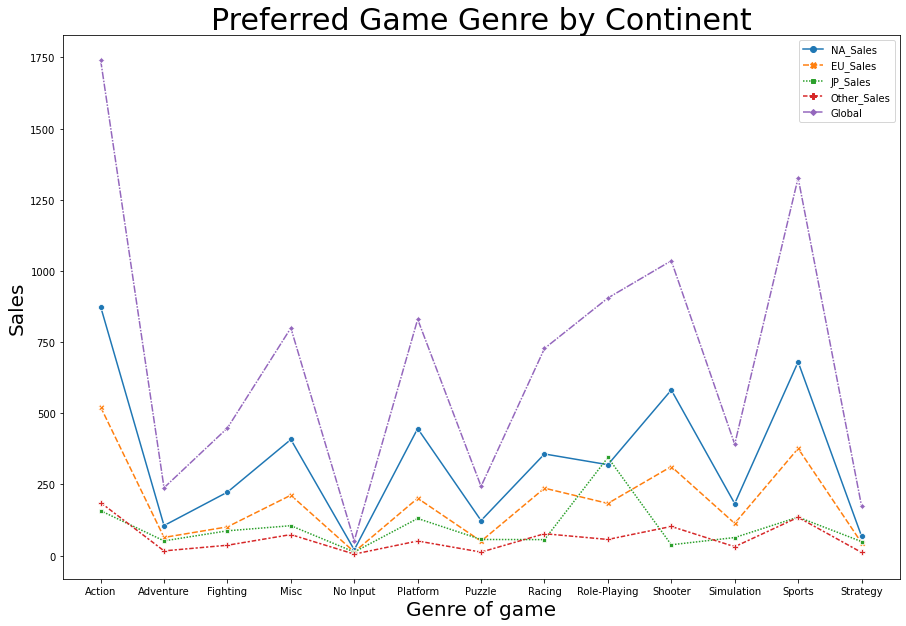

In [65]:
#Method2. Summation

df_stat=df.iloc[:,3:10].groupby('Genre').sum()

plt.figure(figsize=(15, 10))
plt.title("Preferred Game Genre by Continent", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Sales", fontsize=20)

sns.lineplot(data=df_stat, markers=True);


In [30]:
df_stat_global.sort_values(), df_stat_NA.sort_values(), df_stat_EU.sort_values(), df_stat_JP.sort_values(), df_stat_Other.sort_values(), 

(Genre
 No Input          52.15
 Strategy         174.84
 Adventure        238.47
 Puzzle           243.47
 Simulation       391.49
 Fighting         448.40
 Racing           727.79
 Misc             799.72
 Platform         830.23
 Role-Playing     905.03
 Shooter         1035.90
 Sports          1327.04
 Action          1741.32
 Name: Global, dtype: float64, Genre
 No Input         20.61
 Strategy         68.70
 Adventure       105.66
 Puzzle          123.35
 Simulation      182.96
 Fighting        223.20
 Role-Playing    319.54
 Racing          357.19
 Misc            408.05
 Platform        446.44
 Shooter         581.92
 Sports          680.52
 Action          874.81
 Name: NA_Sales, dtype: float64, Genre
 No Input         13.12
 Strategy         45.32
 Puzzle           50.73
 Adventure        64.05
 Fighting        101.22
 Simulation      113.35
 Role-Playing    183.58
 Platform        201.61
 Misc            212.36
 Racing          237.10
 Shooter         313.05
 Sports         

Action-Sports-Shooter　３강. 일본만 RPG-Action-Sports

워스트: Adventure, Puzzle, Strategy가 순서만 다르게.

개별 추출 결과와 총계의 결과가 다른 것으로 보았을 때, 스포츠는 특히 자잘한 작품들이 끊임없이 나와서 매출이 쌓여가는 스타일임을 알 수 있고 액션류는 대작 위주임을 알 수 있음.

#C. 연도별 게임 트렌드

In [89]:
## 1 sample t test for all genre #better

np.random.seed(10)

for yy, groupy in df_log.groupby('Year'):
  ymean = groupy.iloc[:,9].sample(300, replace=True).mean()
  #print('Year: ', yy, 'year mean :', ymean)
  if yy == 2010: print('------------')
  for k1, group in groupy.groupby('Genre'):
      tmpsample = group.sample(30, replace=True).Global
      if st.ttest_1samp(tmpsample, ymean)[1] < 0.05 :
        if ymean < tmpsample.mean():

          print('Year: ', yy, ':', k1)

Year:  0 : Action
Year:  1980 : Shooter
Year:  1981 : Platform
Year:  1981 : Puzzle
Year:  1982 : Misc
Year:  1982 : Platform
Year:  1982 : Puzzle
Year:  1982 : Shooter
Year:  1983 : Misc
Year:  1983 : Platform
Year:  1983 : Sports
Year:  1984 : Action
Year:  1984 : Shooter
Year:  1984 : Sports
Year:  1985 : Fighting
Year:  1985 : Platform
Year:  1985 : Shooter
Year:  1985 : Sports
Year:  1986 : Racing
Year:  1986 : Role-Playing
Year:  1987 : Adventure
Year:  1987 : Fighting
Year:  1987 : Platform
Year:  1987 : Role-Playing
Year:  1988 : Platform
Year:  1988 : Puzzle
Year:  1988 : Racing
Year:  1988 : Sports
Year:  1989 : Platform
Year:  1989 : Sports
Year:  1990 : Action
Year:  1990 : Platform
Year:  1990 : Puzzle
Year:  1990 : Racing
Year:  1990 : Role-Playing
Year:  1991 : Adventure
Year:  1991 : Platform
Year:  1991 : Racing
Year:  1992 : Action
Year:  1992 : Misc
Year:  1992 : Platform
Year:  1992 : Puzzle
Year:  1992 : Racing
Year:  1992 : Simulation
Year:  1993 : Fighting
Year: 

In [90]:
## 1 sample t test for all genre #worst

np.random.seed(10)

for yy, groupy in df_log.groupby('Year'):
  ymean = groupy.iloc[:,9].sample(300, replace=True).mean()
  #print('Year: ', yy, 'year mean :', ymean)
  if yy == 2010: print('------------')
  for k1, group in groupy.groupby('Genre'):
      tmpsample = group.sample(30, replace=True).Global
      if st.ttest_1samp(tmpsample, ymean)[1] < 0.05 :
        if ymean > tmpsample.mean():

          print('Year: ', yy, ':', k1)

Year:  0 : Racing
Year:  0 : Role-Playing
Year:  0 : Simulation
Year:  1980 : Action
Year:  1980 : Fighting
Year:  1980 : Misc
Year:  1980 : No Input
Year:  1981 : Racing
Year:  1981 : Simulation
Year:  1981 : Sports
Year:  1982 : Action
Year:  1982 : Sports
Year:  1983 : Action
Year:  1983 : Adventure
Year:  1983 : Puzzle
Year:  1983 : Shooter
Year:  1984 : Misc
Year:  1984 : Platform
Year:  1984 : Puzzle
Year:  1985 : Action
Year:  1985 : Simulation
Year:  1986 : Shooter
Year:  1987 : Action
Year:  1987 : Shooter
Year:  1988 : Action
Year:  1988 : Shooter
Year:  1988 : Simulation
Year:  1989 : Misc
Year:  1989 : Role-Playing
Year:  1989 : Shooter
Year:  1990 : Simulation
Year:  1990 : Sports
Year:  1991 : Fighting
Year:  1991 : Misc
Year:  1991 : Sports
Year:  1991 : Strategy
Year:  1992 : Shooter
Year:  1992 : Strategy
Year:  1993 : Adventure
Year:  1993 : Misc
Year:  1993 : Racing
Year:  1993 : Simulation
Year:  1994 : Action
Year:  1994 : Misc
Year:  1995 : Adventure
Year:  1995 :

In [110]:
year_mtd2 = df.groupby(by=['Year', 'Genre'])['Global'].sum().reset_index()
year_mtd2 = year_mtd2.query('Year != 0')
year_yn = year_mtd2.groupby(by=['Year'])['Global'].transform(max) == year_mtd2['Global']
year_max = year_mtd2[year_yn].reset_index(drop=True)


In [111]:
year_max

,Year,Genre,Global
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,43.17
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,27.73
9,1989,Puzzle,37.75


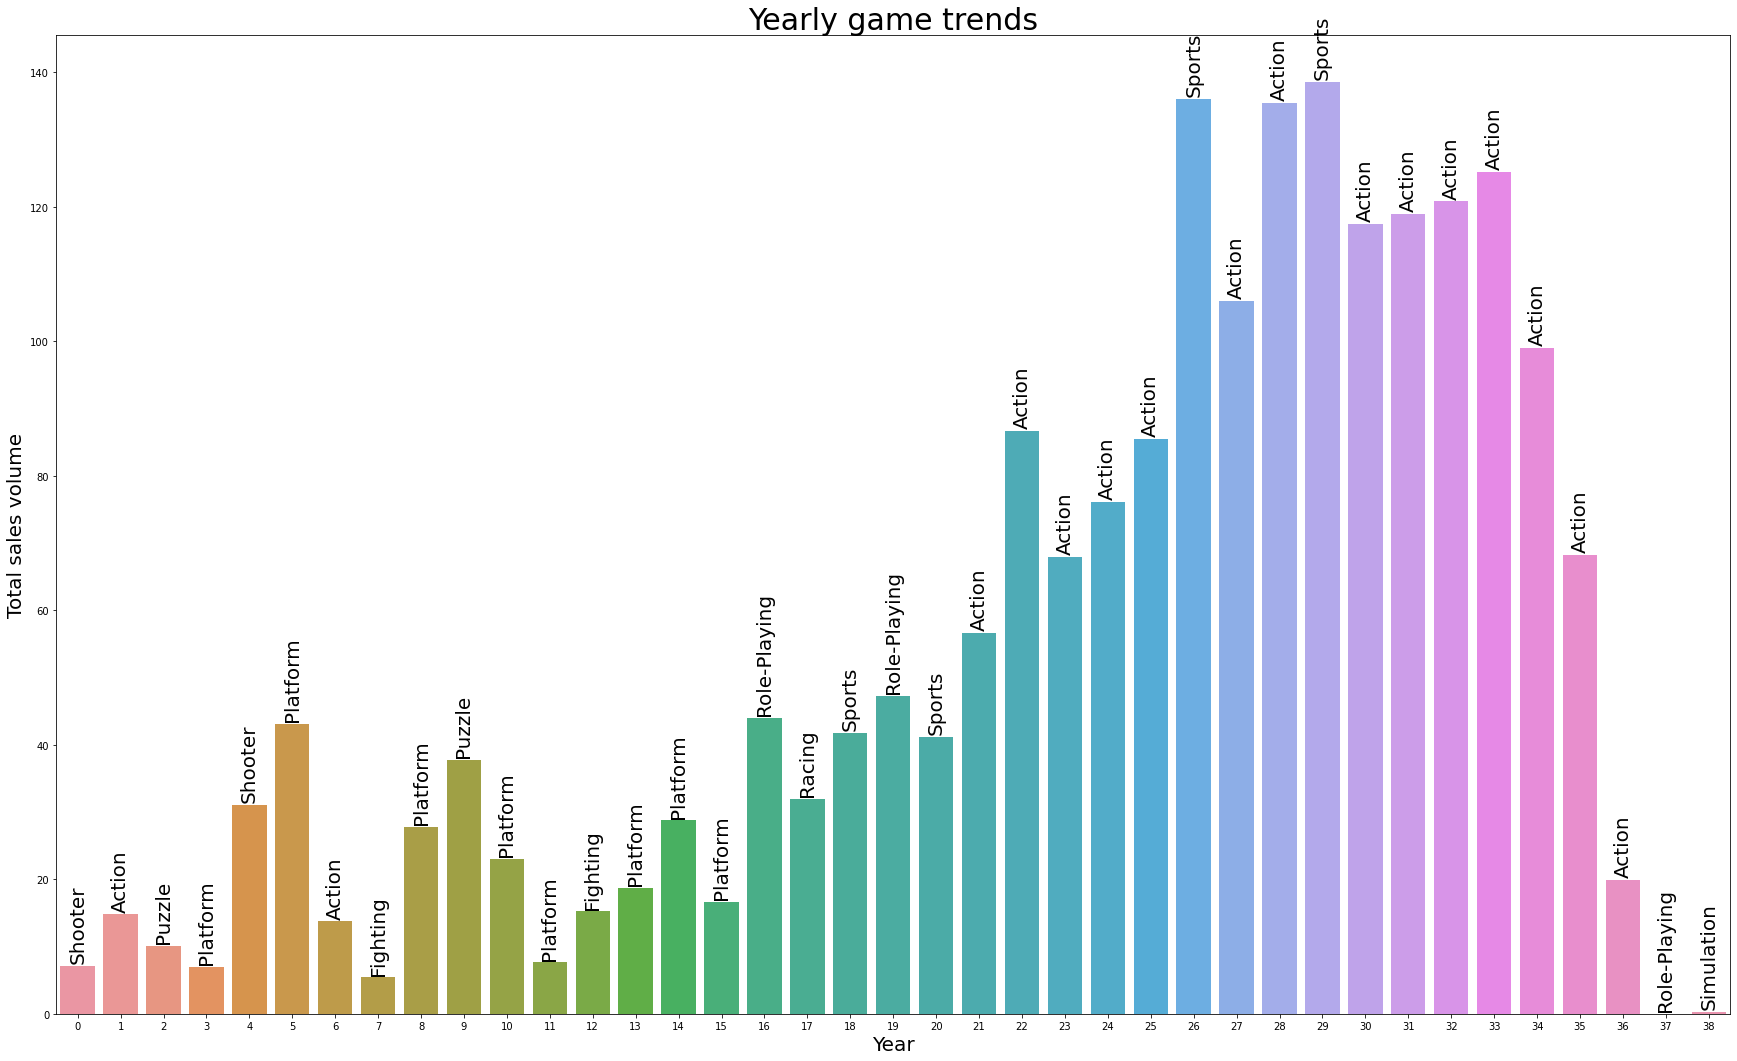

In [112]:
#Method2. Summation

plt.figure(figsize=(30, 18))
#gg = sns.lineplot(data=year_max, markers=True);

gg = sns.barplot(x=year_max.index, y='Global', data=year_max);


genre = year_max['Genre']


index = 0
for value in year_max['Global']:
  gg.text(index, value + 1, genre.iloc[index], color='#000', size=20, rotation= 90, ha="center")
  index += 1

plt.title("Yearly game trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

plt.show()

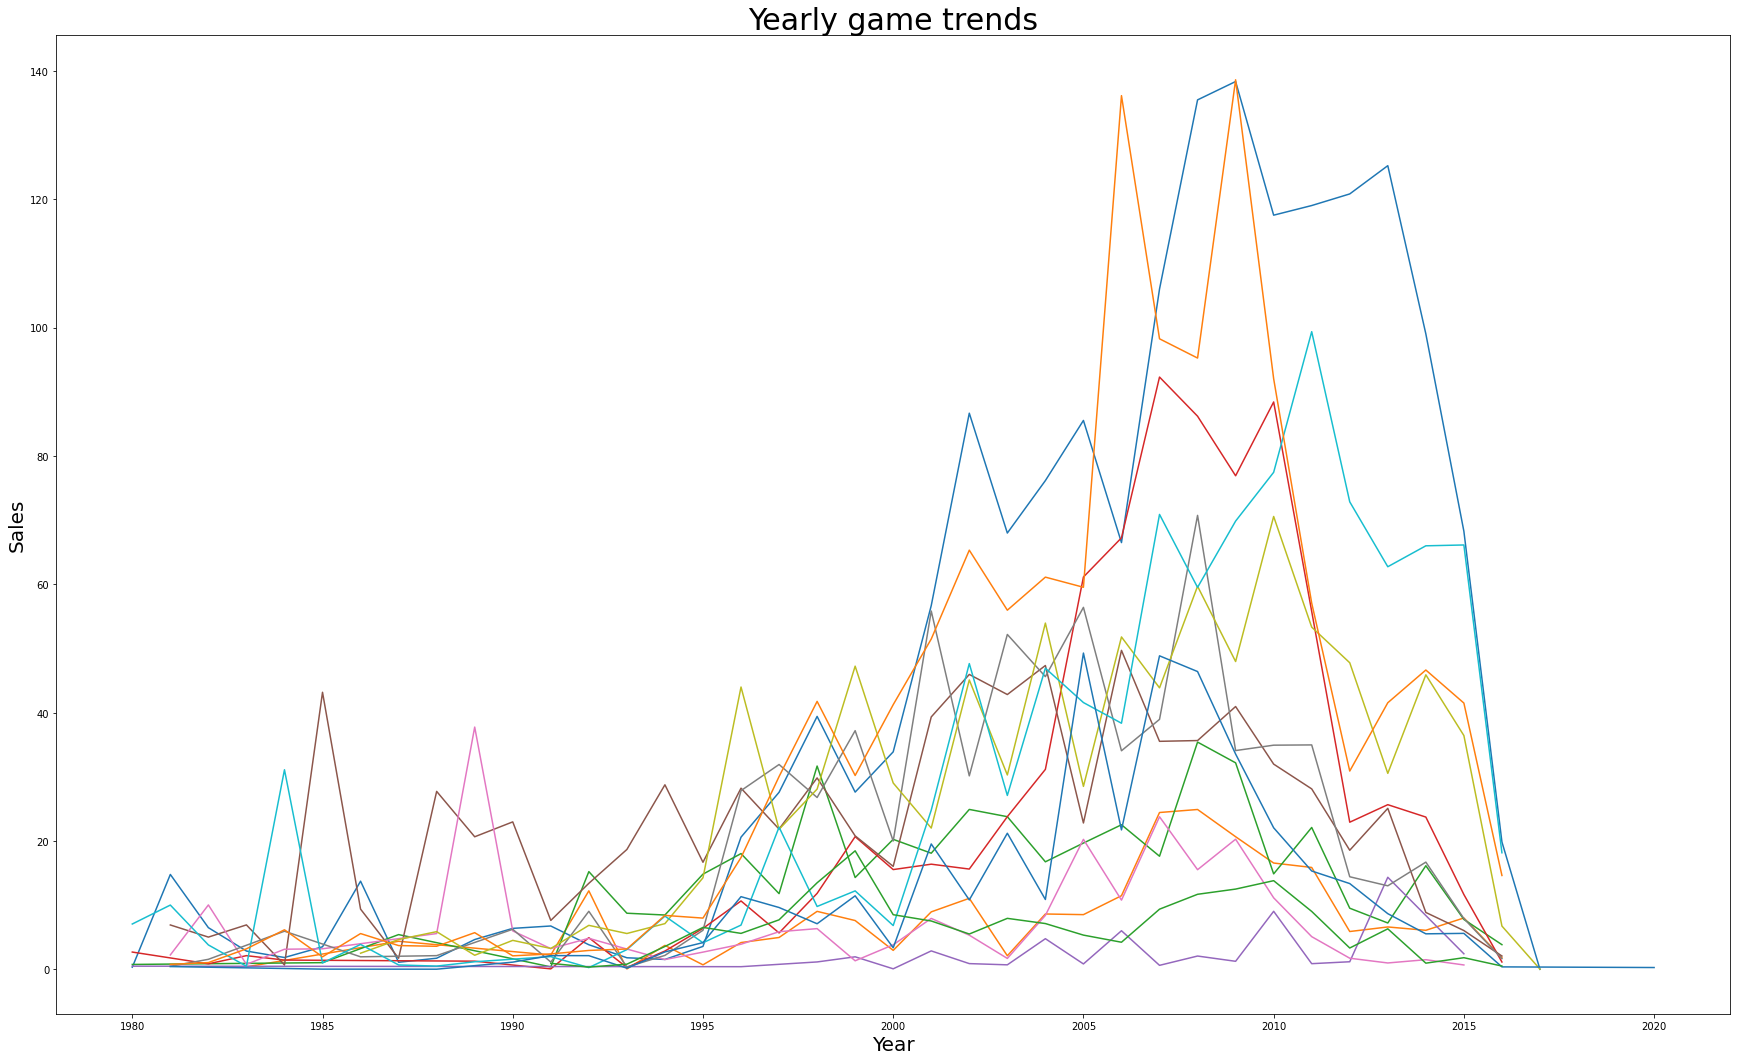

In [87]:
plt.figure(figsize=(30, 18))



for k1, group in year_mtd2.groupby('Genre'):
  sns.lineplot(x = 'Year', y = 'Global', data=group, markers=True);

plt.title("Yearly game trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Sales", fontsize=20)

plt.show()


df_stat=df.iloc[:,3:10].groupby('Genre').sum()

plt.figure(figsize=(15, 10))
plt.title("Preferred Game Genre by Continent", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Sales", fontsize=20)

sns.lineplot(data=df_stat, markers=True);

총량으로 보았을 때, 최근은 액션게임의 대세.

# Part 3 인기 많은 게임에 대한 분석 및
# 다음 분기에 만들 게임에 대한 방향설정

In [ ]:
#기존 프랜차이즈 게임, 개발해서는 안될 장르... 복합장르 , 크로스플랫폼

# 총계 vs 평균

총계분석은 시장의 총 규모를 알아보기 좋음
대형 프랜차이즈의 견인에 의해 규모가 큰 경우를 분석시 감안해야함

평균 분석은 개별 사례를 추출하여 분석하는 방식이므로 우리가 임의의 게임을 출시했을 때의 결과를 시뮬레이팅하는 가정을 생각해 볼 수 있음
표본이 충분하고 균일해야 하지만 게임시장의 표본은 균질하지 않음


지역/연도/장르

이 데이터는 세가지 축으로 분석이 가능하다고 보았습니다. 첫째는 합계입니다.
둘째는 평균입니다.
셋째는 특수치입니다. 잘나가는 프랜차이즈 등. 하지만 우리는 잘 나가는 프랜차이즈를 급조할 수 있는 것이 아니기 때문에 이 분석이 의미를 가지기는 어려울 것입니다. 

오히려 개발해서는 안될 장르에 대한 결론들을 여러가지 도출할 수 있었는데요 

Remind: 최상위권 위주로 관찰하는 방식으로는 이 시장에서 살아남기 어렵다.
같은 이유로, 총계를 관찰하는 방식보다는 평균을 관찰하는 방식이 개발을 위한 분석에 유용.

Adventure / Puzzle / Strategy는 모든 지표에서 기피장르.

플랫폼/슈터 장르를 추천해볼만 함.

기획을 해 본다면, 플랫폼/슈터 복합 장르로 게임을 만들어보기를 권장해보고 싶음. 

필요한 리소스가 크지 않을 것이며, 크로스플랫폼으로 즐기기에도 어렵지 않을 것임.